In [40]:
# Import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [62]:
# Now we need to read in the data
df = pd.read_csv(r"D:\diri sendiri\PORTFOLIO PROJECTS\Pythonzzzz\Movie Dataset Correlation\movies-dataset.csv")

In [63]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [64]:
# Check if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [65]:
# Let's clean data by removing the missing value

df = df.dropna()

In [66]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [67]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [68]:
# Correct the Year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [69]:
# Sort by Gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df

# An option to display all rows

#pd.set_option('display.max_rows', None)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


In [11]:
# Thoughts and guesses: gross and budget high correlation, gross and company high correlationa

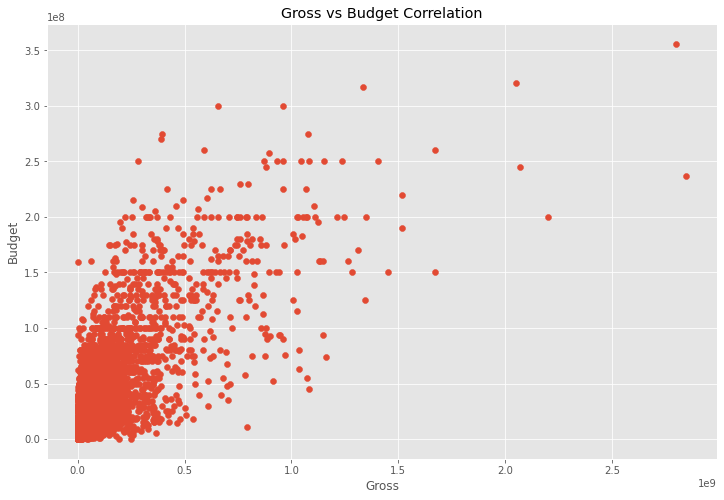

In [70]:
# Scatter plot with gross vs budget

x = df['gross']
y = df['budget']

plt.scatter(x,y)

plt.title('Gross vs Budget Correlation')

plt.xlabel('Gross')
plt.ylabel('Budget')

plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

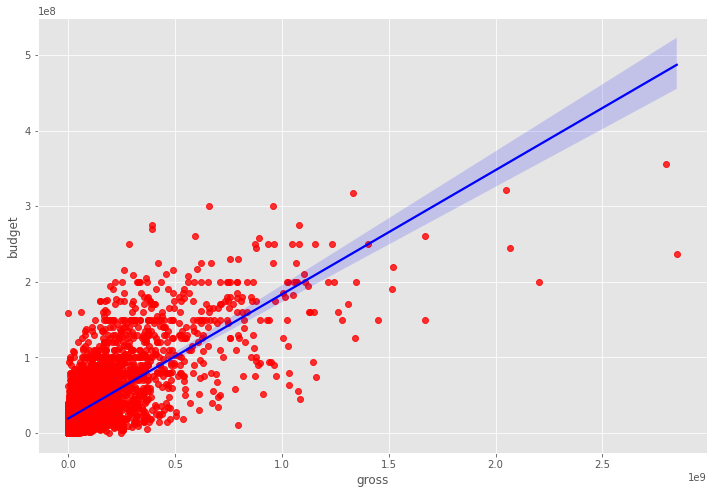

In [71]:
# Regression Plot
# Plot the Budget and Gross using Seaborn

x = df['gross']
y = df['budget']

sns.regplot(x=x, y=y, data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [72]:
# Looking at correlation
# Correlation methods: Pearson, Spearman, Kendall, etc
# Default is Pearson

df.corr()

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


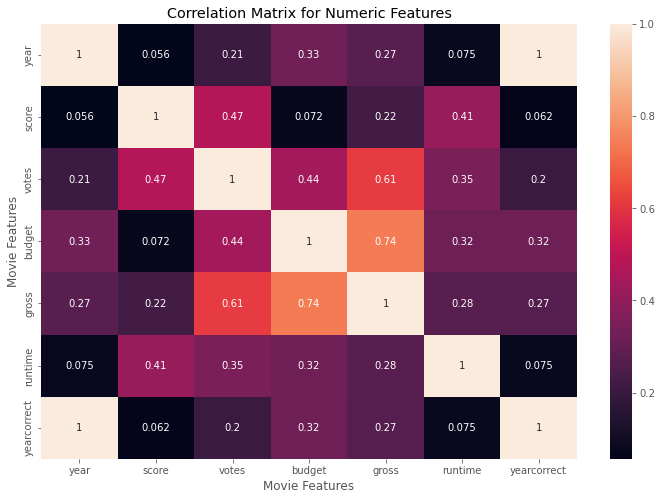

In [75]:
# Create better visualization for the correlation with correlation matrix using seaborn
# PS: Correlation matrix only works for numerical values

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [74]:
# Looking at another feature than budget, e.g. company
# Company at first is not a numerical value

# Step to do: "numerize" the company

df_numerized = df.copy()

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):  # which is not numerical
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,2015
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,1994
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108,2001
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85,1982


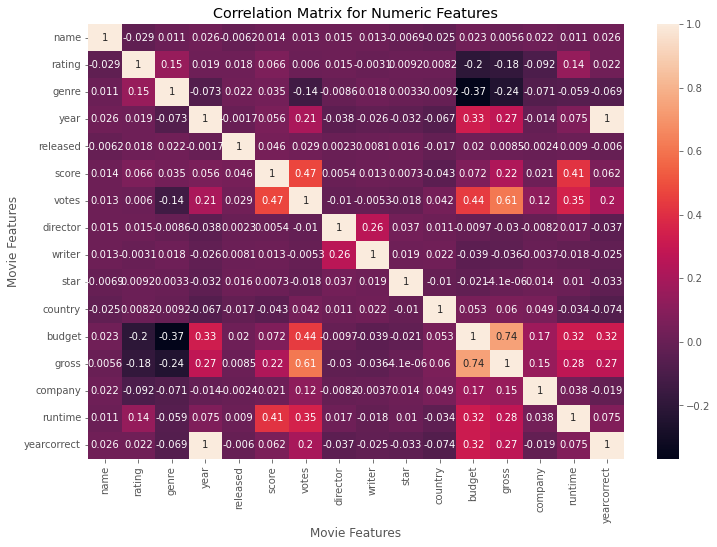

In [76]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [78]:
# Let's unstack the matrix

corr_matrix = df_numerized.corr(method='pearson')

corr_unstack = corr_matrix.unstack()

corr_unstack

pd.set_option('display.max_rows', None)

In [79]:
corr_unstack

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [81]:
corr_unstack = corr_unstack.sort_values()

corr_unstack

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
genre        year          -0.073167
year         genre         -0.073167
genre        company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [88]:
# Take a look at only the ones that have high correlation

high_corr = corr_unstack[(corr_unstack) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
score        score          1.000000
released     released       1.000000
votes        votes          1.000000
genre        genre          1.000000
rating       rating         1.000000
year         year           1.000000
director     director       1.000000
runtime      runtime        1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
name         name           1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64